# The Sparks Foundation - Data Science & Business Analytics Internship


## TASK 1 - Prediction using Supervised Machine Learning
​
In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

### Steps:

- Step 1 - Importing the python libraries & dataset
- Step 2 - Visualizing the dataset
- Step 3 - Data preparation
- Step 4 - Training the algorithm
- Step 5 - Visualizing the model
- Step 6 - Making predictions
- Step 7 - Evaluating the model

## STEP 1 - Importing the Libraries & Dataset
In this step, we will import python libraries required to execute the project and the dataset.

## Importing Libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

## Importing Data Set

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

#Display The Head of DataFrame
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

# As we can see here, there are 25 rows of Hours and Scores each
# Mean Hours is 5 and Mean score is 51

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
# Check How Many Rows And Columns Are There
# (rows,columns)

df.shape

(25, 2)

In [5]:
# To Show More Information About The The DataFrame

df.info()

# Conclusions :-
# 1. - > There are no null values.
# 2. - > Hours has float data type
# 3. - > Score has integer data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step 2 - Visualising Data

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

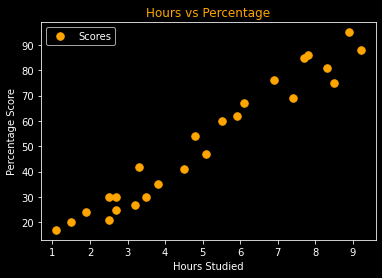

In [6]:
# Plotting the distribution of scores

plt.style.use('dark_background')

# Entering the input values to plot
df.plot(x='Hours', y='Scores',style='.',color ='orange',markersize = 15) 

#Title of graph
plt.title('Hours vs Percentage',color='orange')  

# X & Y labels
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### Correlation Between Scores & Hours

In [7]:
Correlation = df.corr()
Correlation

# if the Correlaion is -
#  Positive->  when the hours increase, the scores increase too
#  Negative->   when the hours decrease, the scores decrease too

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

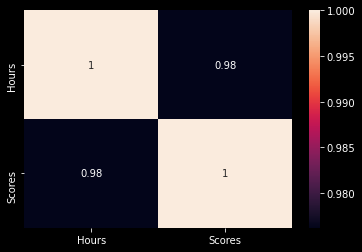

In [8]:
sns.heatmap(Correlation,annot= True)

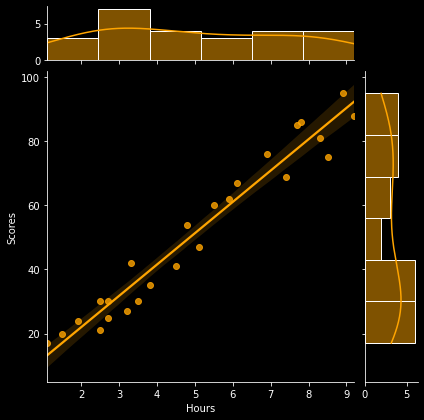

In [42]:
# Joinplot the dataframe

plt.style.use('dark_background')
sns.jointplot("Hours", "Scores", data=df, kind='reg',color='orange',marginal_ticks=True);

# Step 3 -  **Data Preparation**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [10]:
df 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
X = df[['Hours']] 
y = df['Scores'] 


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
# Import train_test_split from sklearn Library

from sklearn.model_selection import train_test_split  

# Input X_train, X_test, y_train, y_test from X & y using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Step 4 - **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
# Import Linear Regression Library from sklearn

from sklearn.linear_model import LinearRegression  

# Create Linear Regression Object
reg = LinearRegression()  

# Fit the X_train and y_train in the Linear Regression Object
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [14]:
# Put the X_test in Linear Regression Predict Model to output y_predict

y_pred = reg.predict(X_test)

# Step 5 - Visualising the Model

In [15]:
# Plotting the regression line

#             y = m(slope) *X+ c(y-intercept)
regression_line = reg.coef_*X+reg.intercept_

print('1. Coefficient    =',reg.coef_)
print('2. Intercept      =',reg.intercept_)
print('3. Regression Line = (Coefficient *X + Intercept)')

1. Coefficient    = [9.91065648]
2. Intercept      = 2.018160041434683
3. Regression Line = (Coefficient *X + Intercept)


### Visualising Full Dataset

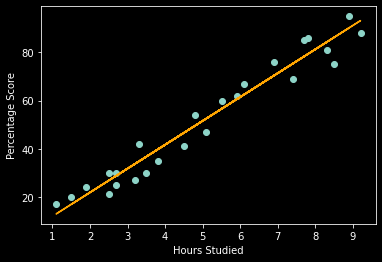

In [24]:
# Plotting for full data

# Plot The Scatter Plot of Hours And Scores
plt.scatter(X, y)

# Setting the labels
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

# Plotting the Linear Regression Line
plt.plot(X, regression_line,color = 'orange');

# Show the Graph
plt.show()

### Visualising the Test Dataset

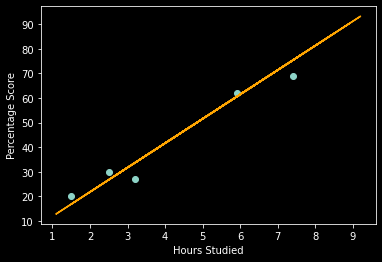

In [25]:
# Plotting for the test data
# Plot The Scatter Plot of Hours And Scores
plt.scatter(X_test, y_test)

# setting labels
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

# Plotting the Linear Regression Line
plt.plot(X,regression_line,color='orange')

# show the graph
plt.show()

# Step 6 - **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

## X_test

In [17]:
# Testing data - In Hours

print(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


## y_test

In [18]:
# Testing data - In Scores

print(y_test) 

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


## y_pred

In [21]:
# predicted score

y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Actual value VS Predicted value of y

In [48]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) .reset_index(drop = True) 

# without .reset_index() it was displaying y_test with its original index from DataFrame
# with .reset_index() it added a column to the left of the original indices which had indices from 0
# with .reset_index(drop = True) the original indices column was dropped

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


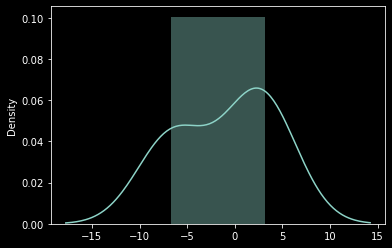

In [49]:
# plotting the error between actual vs predicted

# Show the error plot
sns.distplot(np.array(y_test - y_pred))
plt.show()

### Predicted Score for 9.25 Hrs

In [70]:
# You can also test with your own data
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69


# Step 7 - **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.
For simplicity here, we have chosen the mean square error. There are many such metrics.

1. Mean Squared Error
2. Mean Absolute Error
3. Root Mean Squared Error
4. R2 Score

In [71]:
from sklearn import metrics

print('Mean Squared Error: \t\t',   round(        metrics.mean_squared_error (y_test, y_pred) ,2))
print('Mean Absolute Error: \t\t',  round(        metrics.mean_absolute_error(y_test, y_pred) ,2))
print('Root Mean Squared Error: \t',round(np.sqrt(metrics.mean_squared_error (y_test, y_pred)),2))
print('R2 Score: \t\t\t',           round(        metrics.r2_score           (y_test, y_pred) ,2))

Mean Squared Error: 		 21.6
Mean Absolute Error: 		 4.18
Root Mean Squared Error: 	 4.65
R2 Score: 			 0.95


# THANK YOU